## Environment Setup
### Purpose
This initial section focuses on setting up the Python environment by installing specific versions of essential libraries required for the machine learning tasks in this notebook. This ensures reproducibility and compatibility of the code.

### Key Libraries to be Installed:
- **scikit-learn (sklearn)**: A comprehensive library for machine learning in Python, providing tools for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
- **imbalanced-learn (imblearn)**: A package offering techniques to deal with imbalanced datasets, which are common in classification tasks. It provides methods for over-sampling, under-sampling, and combination sampling.

### Install Specific Library Versions

This cell installs `scikit-learn` version 1.3.2 and `imbalanced-learn` version 0.11.0. Pinning library versions is crucial for ensuring that the code runs consistently across different environments and over time.

- **Purpose**: To install precise versions of `scikit-learn` and `imbalanced-learn` for compatibility and reproducibility.
- **Command**: `pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0` uses pip to install or upgrade (`-U`) the specified packages to the given versions.
- **Output**: The cell will show the installation process, including downloading and installing the packages and their dependencies. It might also indicate if existing versions are uninstalled to meet the version requirements.

In [ ]:
# Install specific versions of scikit-learn and imbalanced-learn
pip install -U scikit-learn==1.3.2 imbalanced-learn==0.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.5 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 11.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


### Verify Library Versions

This cell imports the installed libraries (`sklearn` and `imblearn`) and prints their versions to confirm that the correct versions were installed by the previous step.

- **Purpose**: To verify that the specified versions of `scikit-learn` and `imbalanced-learn` are now active in the environment.
- **Output**: Prints the installed versions of scikit-learn and imbalanced-learn (e.g., "scikit-learn version: 1.3.2", "imbalanced-learn version: 0.11.0").

In [ ]:
# Import the libraries to check their versions
import sklearn
import imblearn

# Print the version of scikit-learn
print("scikit-learn version:", sklearn.__version__)
# Print the version of imbalanced-learn
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.3.2
imbalanced-learn version: 0.11.0


### Import Necessary Libraries

This cell imports all other Python libraries and modules required for various tasks throughout the notebook, including data downloading, file operations, data manipulation, image processing, plotting, and model building.

- **Purpose**: To load all required modules into the Python environment for easy access in subsequent cells.
- **Key Libraries Imported**:
    - `gdown`: For downloading files from Google Drive.
    - `csv`, `os`, `shutil`, `zipfile`, `pathlib.Path`: For file and directory operations.
    - `pandas (pd)`: For data manipulation and analysis, primarily using DataFrames.
    - `hashlib`: For generating MD5 hashes to check file integrity/duplication.
    - `tqdm`: For displaying progress bars during iterative tasks.
    - `cv2 (OpenCV)`: For image processing tasks.
    - `numpy (np)`: For numerical operations, especially array manipulations.
    - `PIL (Pillow)`: For image opening, manipulation, and saving.
    - `matplotlib.pyplot (plt)`: For creating static, interactive, and animated visualizations.
    - `random`, `math`: Standard Python libraries for random number generation and mathematical functions.
    - `sklearn.model_selection.train_test_split`: For splitting datasets into training and testing sets.
    - `imblearn.under_sampling.TomekLinks`, `imblearn.over_sampling.SMOTE`: For handling imbalanced datasets.
    - `collections.Counter`: For counting hashable objects (e.g., class distribution).
    - `tensorflow.keras.preprocessing.image.ImageDataGenerator`: For real-time data augmentation and image loading in Keras.
- **Output**: This cell typically produces no visible output unless there are import errors. It makes the imported modules available for use.

In [ ]:
# For downloading files from Google Drive
import gdown 
# For working with CSV files
import csv 
# For interacting with the operating system (file paths, directories)
import os 
# For high-level file operations (copying, removing directories)
import shutil 
# For working with ZIP archives
import zipfile 
# For data manipulation and analysis (DataFrames)
import pandas as pd 
# For generating MD5 hashes (checking for duplicate files)
import hashlib 
# For displaying progress bars
from tqdm import tqdm 
# For image processing (OpenCV)
import cv2 
# For numerical operations (arrays, matrices)
import numpy as np 
# For image manipulation (Python Imaging Library)
from PIL import Image 
# For object-oriented filesystem paths
from pathlib import Path 
# For plotting graphs and visualizations
import matplotlib.pyplot as plt 
# For generating random numbers and choices
import random 
# For mathematical functions
import math 
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split 
# For under-sampling techniques (Tomek Links)
from imblearn.under_sampling import TomekLinks 
# For over-sampling techniques (SMOTE)
from imblearn.over_sampling import SMOTE 
# For counting occurrences of items in a collection (e.g., class distribution)
from collections import Counter 
# For real-time data augmentation and loading images in Keras/TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-15 13:21:22.360472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747315282.687099     106 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747315282.780933     106 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Main Dataset Acquisition

This section handles the download and extraction of the primary dataset used for the project. The dataset is sourced from Google Drive.# Main dataset

In [ ]:
# Google Drive file ID for the main training images
file_id = "1imVvr3Ydu8CdhM-mjEJ0Wc7IiH5wKV5e"
file_name = "train_images.zip"
folder_name = "/kaggle/working/original_data"

# Delete the folder if it already exists to prevent errors or outdated files
if os.path.exists(folder_name):
    shutil.rmtree(folder_name)

# Create the folder to store the downloaded data
folder_path = os.mkdir(folder_name)
file_path = os.path.join(folder_name, file_name)

# Download the file from Google Drive using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=1imVvr3Ydu8CdhM-mjEJ0Wc7IiH5wKV5e
From (redirected): https://drive.google.com/uc?id=1imVvr3Ydu8CdhM-mjEJ0Wc7IiH5wKV5e&confirm=t&uuid=13e46149-5f54-4189-a30f-6d481e57d59d
To: /kaggle/working/original_data/train_images.zip
100%|██████████| 820M/820M [00:13<00:00, 60.6MB/s] 

Downloaded: /kaggle/working/original_data/train_images.zip


### Extract Main Training Images

This cell extracts the contents of the downloaded `train_images.zip` file into the `/kaggle/working/original_data/` directory.

In [ ]:
# Path to the downloaded zip file
zip_file_path = "/kaggle/working/original_data/train_images.zip"
# Directory where the contents will be extracted
extraction_path = "/kaggle/working/original_data"

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents into the specified directory
    zip_ref.extractall(extraction_path)

print("Extraction complete.")

Extraction complete.


### Download Metadata File

This cell downloads the metadata file (`meta_train.csv`) associated with the main training images from Google Drive.

- **Purpose**: To obtain the CSV file containing labels and other information for the training images.

In [15]:
# Google Drive file ID 
file_id = "1HHhdIPkl4hrYer0udqFwg4U1SgwPRbkz"
file_name = "meta_train.csv"
folder_name = "/kaggle/working/original_data"

file_path = os.path.join(folder_name, file_name)

# Download from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From: https://drive.google.com/uc?id=1HHhdIPkl4hrYer0udqFwg4U1SgwPRbkz
To: /kaggle/working/original_data/meta_train.csv
100%|██████████| 335k/335k [00:00<00:00, 67.7MB/s]

Downloaded: /kaggle/working/original_data/meta_train.csv


# Extra Data Acquisition

This section details the process of downloading and preparing additional image datasets from various sources to augment the main dataset. These extra datasets provide more examples of rice leaf diseases, potentially improving model robustness and generalization.

### Download Extra Dataset 1 (552 Images, 3 Classes)

- **Source**: [https://github.com/aldrin233/RiceDiseases-DataSet](https://github.com/aldrin233/RiceDiseases-DataSet)
- **Description**: Provides 552 additional close-up images categorized into 3 diseases: Bacterial leaf blight, Blast, and Brown spot.

In [ ]:
# Google Drive file ID for the first extra dataset
file_id = "1ZxONbeIif8gUJKSnN9w1rrBWFwkvw2mD"
file_name = "extra_552_images_3_class.zip"
folder_name = "/kaggle/working/extra_data"

# Delete the folder if it exists to ensure a fresh download
if os.path.exists(folder_name):
    shutil.rmtree(folder_name)

# Create the folder for extra data
folder_path = os.mkdir(folder_name)
file_path = os.path.join(folder_name, file_name)

# Download the first extra dataset
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From: https://drive.google.com/uc?id=1ZxONbeIif8gUJKSnN9w1rrBWFwkvw2mD
To: /kaggle/working/extra_data/extra_552_images_3_class.zip
100%|██████████| 16.7M/16.7M [00:00<00:00, 52.4MB/s]

Downloaded: /kaggle/working/extra_data/extra_552_images_3_class.zip


### Download Extra Dataset 2 (120 Images, 3 Classes)

- **Source**: [https://archive.ics.uci.edu/dataset/486/rice+leaf+diseases](https://archive.ics.uci.edu/dataset/486/rice+leaf+diseases)
- **Description**: Provides 120 additional close-up images for 3 diseases: Bacterial leaf blight, Brown spot, and Leaf Smut. Note: Leaf Smut is not in the scope of the main dataset, therefore will not be extracted.

In [ ]:
# Google Drive file ID for the second extra dataset
file_id = "111W_A5pS36wza6CVrHn4aTiyYchb2DGG"
file_name = "extra_120_images_3_class.zip"
folder_name = "/kaggle/working/extra_data" # This folder should already exist from the previous step

file_path = os.path.join(folder_name, file_name)

# Download the second extra dataset
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=111W_A5pS36wza6CVrHn4aTiyYchb2DGG
From (redirected): https://drive.google.com/uc?id=111W_A5pS36wza6CVrHn4aTiyYchb2DGG&confirm=t&uuid=a68abede-7149-4ae9-b120-04408add134a
To: /kaggle/working/extra_data/extra_120_images_3_class.zip
100%|██████████| 38.5M/38.5M [00:00<00:00, 100MB/s] 

Downloaded: /kaggle/working/extra_data/extra_120_images_3_class.zip


### Download Extra Dataset 3 (3k Images, 4 Classes)

- **Source**: [https://www.kaggle.com/datasets/nizorogbezuode/rice-leaf-images?select=rice_images](https://www.kaggle.com/datasets/nizorogbezuode/rice-leaf-images?select=rice_images)
- **Description**: Provides 3355 additional close-up images covering 4 categories: Brown spot, Hispa, Healthy, and Leaf Blast.

In [ ]:
# Google Drive file ID for the third extra dataset
file_id = "115EjFI3YdWqnue4-yy4BHqyU_rA8uiZ4"
file_name = "extra_3k_image_4_class.zip"
folder_name = "/kaggle/working/extra_data"

file_path = os.path.join(folder_name, file_name)

# Download the third extra dataset
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From (original): https://drive.google.com/uc?id=115EjFI3YdWqnue4-yy4BHqyU_rA8uiZ4
From (redirected): https://drive.google.com/uc?id=115EjFI3YdWqnue4-yy4BHqyU_rA8uiZ4&confirm=t&uuid=ecf69466-2020-48ac-98a7-02b185f7cdab
To: /kaggle/working/extra_data/extra_3k_image_4_class.zip
100%|██████████| 18.5M/18.5M [00:00<00:00, 38.7MB/s]

Downloaded: /kaggle/working/extra_data/extra_3k_image_4_class.zip


### Download Extra Dataset 4 (240 Images, 3 Classes)

- **Source**: [https://www.kaggle.com/datasets/tedisetiady/leaf-rice-disease-indonesia?select=tungro](https://www.kaggle.com/datasets/tedisetiady/leaf-rice-disease-indonesia?select=tungro)
- **Description**: Provides 240 additional close-up images for 3 diseases: Blight, Blast, and Tungro. Due to the high volume of additional data in Blight and Blast diseases, Tungro will only be extracted to improve class distribution or for specific analysis on this disease.

In [ ]:
# Google Drive file ID for the fourth extra dataset
file_id = "1EQVy4zFZ_jxazTBoO9rS4wnytiYC6Mgx"
file_name = "extra_240_image_3_class.zip"
folder_name = "/kaggle/working/extra_data"
file_path = os.path.join(folder_name, file_name)

# Download the fourth extra dataset
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

print(f"Downloaded: {file_path}")

Downloading...
From: https://drive.google.com/uc?id=1EQVy4zFZ_jxazTBoO9rS4wnytiYC6Mgx
To: /kaggle/working/extra_data/extra_240_image_3_class.zip
100%|██████████| 22.7M/22.7M [00:00<00:00, 34.0MB/s]

Downloaded: /kaggle/working/extra_data/extra_240_image_3_class.zip


### Extract All Extra Datasets

In [ ]:
extra_data_path = "/kaggle/working/extra_data"
# Iterate through all items in the extra_data directory
for zip_file_name in os.listdir(extra_data_path):
    zip_file_path = os.path.join(extra_data_path, zip_file_name)
    # Check if the item is a file and ends with .zip extension
    if os.path.isfile(zip_file_path) and zip_file_name.lower().endswith('.zip'):
        try:
            # Open the zip file in read mode
            with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                # Extract all contents into the extra_data_path directory
                zip_ref.extractall(extra_data_path)
            print(f"Extracted: {zip_file_name}")
        except zipfile.BadZipFile:
            print(f"Skipping bad zip file: {zip_file_name}")
    # elif os.path.isdir(zip_file_path): 
        # This part of the original code was likely an error, 
        # as it attempts to unzip a directory. 
        # If the intention was to handle already extracted folders, different logic would be needed.
        # For now, we'll assume only .zip files need explicit extraction.
        # print(f"Item is a directory, skipping extraction: {zip_file_name}")
        
print("Extraction process complete.")

Extraction complete.


# Data Cleaning

This section focuses on cleaning the datasets. The first step is to check for missing values in the main metadata file.

### Check for Missing Values in Metadata

This cell reads the main metadata file (`meta_train.csv`) into a pandas DataFrame and then checks for any missing values in each column.


In [ ]:
# Load the main metadata CSV file into a pandas DataFrame
MetaImagesDataframe = pd.read_csv('/kaggle/working/original_data/meta_train.csv')

# Display the sum of missing values for each column in the DataFrame
print("Missing values per column in meta_train.csv:")
print(MetaImagesDataframe.isnull().sum())

image_id    0
label       0
variety     0
age         0
dtype: int64


## Placing All Images into a Standardized Folder

This subsection describes the process of consolidating all images from the main dataset and various extra datasets into a single directory for easier management and processing.

In [ ]:
# Define the path for the directory where all images will be standardized and stored
standardize_dir = "/kaggle/working/standardized_images"
# Define the path to the main dataset images (already extracted)
main_dataset_path = "/kaggle/working/original_data/train_images"
# Define the path to the directory containing all extra datasets (already extracted)
extra_dataset_path = "/kaggle/working/extra_data"

### Main Dataset

In [ ]:
# Delete the standardized directory if it already exists to ensure a fresh start
if os.path.exists(standardize_dir):
    shutil.rmtree(standardize_dir)
    
# Create the standardized directory, allowing it to exist if already created by another process
os.makedirs(standardize_dir, exist_ok=True)

# Iterate through each category (subdirectory) in the main dataset path
for category in os.listdir(main_dataset_path):
    category_path = os.path.join(main_dataset_path, category)
    # Check if the item is a directory (i.e., a category folder)
    if os.path.isdir(category_path):
        # Iterate through each image file in the category folder
        for img_file_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file_name)
            # Check if the item is a file (i.e., an image)
            if os.path.isfile(img_path):
                # Copy the image file to the standardized directory
                shutil.copy2(img_path, os.path.join(standardize_dir, img_file_name))

print("Copying main dataset images to standardized folder completed.")

Upload completed.


## Extra Data from GitHub Source (aldrin233/RiceDiseases-DataSet)

### Rename Incorrect Folder Name 
This cell attempts to rename a folder within the first extra dataset from `Orig` to `orig` to ensure consistency. This error is specific for this dataset

In [32]:
# Rename incorrect folder
old_folder = "/kaggle/working/extra_data/RiceDiseases-DataSet-master/blast/Orig"
new_folder = "/kaggle/working/extra_data/RiceDiseases-DataSet-master/blast/orig"

# Rename the folder
os.rename(old_folder, new_folder)

print(f"Renamed {old_folder} to {new_folder}")

Renamed /kaggle/working/extra_data/RiceDiseases-DataSet-master/blast/Orig to /kaggle/working/extra_data/RiceDiseases-DataSet-master/blast/orig


### Prepare Metadata File for Augmentation

This cell copies the original metadata file (`meta_train.csv`) to a new file (`extra_meta_train.csv`). This new file will be augmented with entries for the images from the extra datasets.

In [ ]:
# Define the path to the original metadata file
org_metadata_path = "/kaggle/working/original_data/meta_train.csv"
# Define the path for the new metadata file which will include extra data
new_metadata_path = "/kaggle/working/extra_meta_train.csv"

# Copy the original metadata file to the new path
if os.path.exists(org_metadata_path):
    shutil.copy2(org_metadata_path, new_metadata_path)
    print(f"Copied {org_metadata_path} to {new_metadata_path}")
else:
    print(f"Original metadata file not found: {org_metadata_path}")

'/kaggle/working/extra_meta_train.csv'

### Integrate Images and Metadata from Extra Dataset 1

This cell processes images from the first extra dataset (`RiceDiseases-DataSet-master`). It iterates through specified disease categories, copies new images to `standardize_dir`, and adds corresponding entries to `extra_meta_train.csv`.

In [ ]:
# Define mapping between original category labels and folder names in the extra dataset
orginal_category_list = ['bacterial_leaf_blight', 'blast', 'brown_spot']
extra_category_list = ['Bacterial leaf blight', 'blast', 'brownspot'] # Folder names in the dataset

# Load existing CSV if it exists, otherwise create an empty DataFrame
if os.path.exists(new_metadata_path):
    df = pd.read_csv(new_metadata_path)
    print(f"Loaded existing CSV with {len(df)} rows.")
else:
    df = pd.DataFrame(columns=['image_id', 'label', 'variety', 'age'])
    print("No existing CSV found. Created new empty DataFrame.")

new_rows = [] # List to store new rows to be added to the DataFrame
dataset_source_folder = "RiceDiseases-DataSet-master" # Subfolder name for this specific extra dataset

# Iterate through each category in the extra dataset
for label_index, category_folder_name in enumerate(extra_category_list):
    # Construct the path to the 'orig' subfolder for the current category
    image_folder = os.path.join(extra_dataset_path, dataset_source_folder, category_folder_name, 'orig')

    # Check if the image folder exists
    if not os.path.isdir(image_folder):
        print(f"Skipping missing folder: {image_folder}")
        continue

    image_extensions = ('.jpg', '.jpeg', '.png', '.webp') # Valid image file extensions
    # Iterate through each file in the image folder
    for img_file in os.listdir(image_folder):
        img_src_path = os.path.join(image_folder, img_file)
        img_dest_path = os.path.join(standardize_dir, img_file)

        # Process only if it's a file with a valid image extension
        if os.path.isfile(img_src_path) and img_file.lower().endswith(image_extensions):
            # Skip if the file already exists in the standardized directory
            if os.path.exists(img_dest_path):
                # print(f"File already exists in standardized_dir, skipping copy: {img_dest_path}")
                # Check if it's in the CSV, if not, add it (handles cases where file was copied but not added to CSV)
                if not df['image_id'].astype(str).str.contains(img_file).any():
                     # print(f"Adding existing image to CSV: {img_file} with label {orginal_category_list[label_index]}")
                     new_rows.append({
                        'image_id': img_file,
                        'label': orginal_category_list[label_index],
                        'variety': '',  # Placeholder as extra datasets might not have this info
                        'age': ''       # Placeholder
                    })
                continue

            # Skip if the image_id is already in the DataFrame (should be redundant if dest_path check is done)
            if df['image_id'].astype(str).str.contains(img_file).any():
                # print(f"Image already in CSV, skipping entry: {img_file}")
                continue

            # Add new row information to the list
            # print(f"Adding new image to CSV: {img_file} with label {orginal_category_list[label_index]}")
            new_rows.append({
                'image_id': img_file,
                'label': orginal_category_list[label_index],
                'variety': '',
                'age': ''
            })

            # Copy the image file to the standardized directory
            shutil.copy2(img_src_path, img_dest_path)
            # print(f"Copied file to standardize_dir: {img_dest_path}")

# Append new rows to the DataFrame if any new images were processed
if new_rows:
    df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
    print(f"Added {len(new_rows)} new image entries to CSV from {dataset_source_folder}.")
    # Save the updated DataFrame to the CSV file
    df.to_csv(new_metadata_path, index=False)
    print(f"CSV file updated and saved at: {new_metadata_path}")
else:
    print(f"No new images were added from {dataset_source_folder}. CSV not updated.")

print(f"Processing for {dataset_source_folder} completed.")

Loaded existing CSV with 10407 rows.
Adding new image to CSV: blight_orig_036.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/blight_orig_036.JPG
Adding new image to CSV: blight_orig_081.jpg with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/blight_orig_081.jpg
Adding new image to CSV: blight_orig_084.jpg with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/blight_orig_084.jpg
Adding new image to CSV: blight_orig_076.jpg with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/blight_orig_076.jpg
Adding new image to CSV: blight_orig_063.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/blight_orig_063.JPG
Adding new image to CSV: blight_orig_020.PNG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standar

### Verify Image and Metadata Counts

This cell prints the total number of files in the `standardize_dir` and the total number of rows in the `extra_meta_train.csv` file to check whether new images are added and logged.

In [ ]:
# Count the number of files in the standardized image directory
print(f"Total files in {standardize_dir}: {len(os.listdir(standardize_dir))}")
# Reload the metadata DataFrame to get the updated row count
df_updated = pd.read_csv(new_metadata_path)
print(f"Number of data rows in {new_metadata_path}: {len(df_updated)}")

10683
Number of data rows: 10683


## Extra Data from Kaggle Source (nizorogbezuode/rice-leaf-images)

This section processes images from the second extra dataset, sourced from Kaggle. It follows a similar procedure of copying images and updating the metadata CSV.

### Integrate Images and Metadata from Extra Dataset 2

This cell processes images from the Kaggle dataset (`rice_images`). It iterates through specified disease and healthy categories, copies new images to `standardize_dir`, and adds corresponding entries to `extra_meta_train.csv`.

In [ ]:
# Define mapping for the Kaggle dataset categories
orginal_category_list_kaggle1 = ['brown_spot', 'normal', 'hispa', 'blast']
extra_category_list_kaggle1 = ['_BrownSpot', '_Healthy', '_Hispa', '_LeafBlast'] # Folder names in this dataset
dataset_source_folder_kaggle1 = "rice_images" # Subfolder name for this specific extra dataset

# Load existing CSV (should have been updated by the previous step)
if os.path.exists(new_metadata_path):
    df = pd.read_csv(new_metadata_path)
    print(f"Loaded existing CSV with {len(df)} rows before processing {dataset_source_folder_kaggle1}.")
else:
    # This case should ideally not happen if the previous cell ran successfully
    df = pd.DataFrame(columns=['image_id', 'label', 'variety', 'age'])
    print(f"CSV file not found at {new_metadata_path}. Created new empty DataFrame.")

new_rows_kaggle1 = [] # List for new rows from this dataset

# Iterate through each category in this extra dataset
for label_index, category_folder_name in enumerate(extra_category_list_kaggle1):
    image_folder = os.path.join(extra_dataset_path, dataset_source_folder_kaggle1, category_folder_name)

    if not os.path.isdir(image_folder):
        print(f"Skipping missing folder: {image_folder}")
        continue

    image_extensions = ('.jpg', '.jpeg', '.png', '.webp')
    for img_file in os.listdir(image_folder):
        img_src_path = os.path.join(image_folder, img_file)
        img_dest_path = os.path.join(standardize_dir, img_file)

        if os.path.isfile(img_src_path) and img_file.lower().endswith(image_extensions):
            if os.path.exists(img_dest_path):
                # print(f"File already exists in standardized_dir, skipping copy: {img_dest_path}")
                if not df['image_id'].astype(str).str.contains(img_file).any():
                    # print(f"Adding existing image to CSV: {img_file} with label {orginal_category_list_kaggle1[label_index]}")
                    new_rows_kaggle1.append({
                        'image_id': img_file,
                        'label': orginal_category_list_kaggle1[label_index],
                        'variety': '',
                        'age': ''
                    })
                continue
            
            if df['image_id'].astype(str).str.contains(img_file).any():
                # print(f"Image already in CSV, skipping entry: {img_file}")
                continue

            # print(f"Adding new image to CSV: {img_file} with label {orginal_category_list_kaggle1[label_index]}")
            new_rows_kaggle1.append({
                'image_id': img_file,
                'label': orginal_category_list_kaggle1[label_index],
                'variety': '',
                'age': ''
            })
            shutil.copy2(img_src_path, img_dest_path)
            # print(f"Copied file to standardize_dir: {img_dest_path}")

if new_rows_kaggle1:
    df = pd.concat([df, pd.DataFrame(new_rows_kaggle1)], ignore_index=True)
    print(f"Added {len(new_rows_kaggle1)} new image entries to CSV from {dataset_source_folder_kaggle1}.")
    df.to_csv(new_metadata_path, index=False)
    print(f"CSV file updated and saved at: {new_metadata_path}")
else:
    print(f"No new images were added from {dataset_source_folder_kaggle1}. CSV not updated.")

print(f"Processing for {dataset_source_folder_kaggle1} completed.")

Loaded existing CSV with 10683 rows.
Adding new image to CSV: shape 486 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 486 .jpg
Adding new image to CSV: shape 127 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 127 .jpg
Adding new image to CSV: shape 410 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 410 .jpg
Adding new image to CSV: shape 320 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 320 .jpg
Adding new image to CSV: shape 210 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 210 .jpg
Adding new image to CSV: shape 38 .jpg with label brown_spot
Copied file to standardize_dir: /kaggle/working/standardized_images/shape 38 .jpg
Adding new image to CSV: shape 128 .jpg with label brown_spot
Copied file to standardize_dir: /

### Verify Image and Metadata Counts Again

This cell again prints the total number of files in `standardize_dir` and the total number of rows in `extra_meta_train.csv`.

In [ ]:
# Count the number of files in the standardized image directory
print(f"Total files in {standardize_dir}: {len(os.listdir(standardize_dir))}")
# Reload the metadata DataFrame to get the updated row count
df_updated = pd.read_csv(new_metadata_path)
print(f"Number of data rows in {new_metadata_path}: {len(df_updated)}")

12171
Number of data rows: 12171


## Extra Data from UCI Archive (rice+leaf+diseases)

This section processes images from the third extra dataset, sourced from the UCI Machine Learning Repository. It focuses on Bacterial leaf blight and Brown spot, as Leaf Smut is out of scope.

In [ ]:
# Define mapping for the UCI dataset categories (only relevant ones)
orginal_category_list_uci = ['bacterial_leaf_blight', 'brown_spot']
extra_category_list_uci = ['Bacterial leaf blight', 'Brown spot'] # Folder names in this dataset
dataset_source_folder_uci = "rice_leaf_diseases" # Subfolder name for this extra dataset

# Load existing CSV
if os.path.exists(new_metadata_path):
    df = pd.read_csv(new_metadata_path)
    print(f"Loaded existing CSV with {len(df)} rows before processing {dataset_source_folder_uci}.")
else:
    df = pd.DataFrame(columns=['image_id', 'label', 'variety', 'age'])
    print(f"CSV file not found at {new_metadata_path}. Created new empty DataFrame.")

new_rows_uci = []

# Iterate through each relevant category in this extra dataset
for label_index, category_folder_name in enumerate(extra_category_list_uci):
    image_folder = os.path.join(extra_dataset_path, dataset_source_folder_uci, category_folder_name)

    if not os.path.isdir(image_folder):
        print(f"Skipping missing folder: {image_folder}")
        continue

    image_extensions = ('.jpg', '.jpeg', '.png', '.webp')
    for img_file in os.listdir(image_folder):
        img_src_path = os.path.join(image_folder, img_file)
        img_dest_path = os.path.join(standardize_dir, img_file)

        if os.path.isfile(img_src_path) and img_file.lower().endswith(image_extensions):
            if os.path.exists(img_dest_path):
                # print(f"File already exists in standardized_dir, skipping copy: {img_dest_path}")
                if not df['image_id'].astype(str).str.contains(img_file).any():
                    # print(f"Adding existing image to CSV: {img_file} with label {orginal_category_list_uci[label_index]}")
                    new_rows_uci.append({
                        'image_id': img_file,
                        'label': orginal_category_list_uci[label_index],
                        'variety': '',
                        'age': ''
                    })
                continue
            
            if df['image_id'].astype(str).str.contains(img_file).any():
                # print(f"Image already in CSV, skipping entry: {img_file}")
                continue

            # print(f"Adding new image to CSV: {img_file} with label {orginal_category_list_uci[label_index]}")
            new_rows_uci.append({
                'image_id': img_file,
                'label': orginal_category_list_uci[label_index],
                'variety': '',
                'age': ''
            })
            shutil.copy2(img_src_path, img_dest_path)
            # print(f"Copied file to standardize_dir: {img_dest_path}")

if new_rows_uci:
    df = pd.concat([df, pd.DataFrame(new_rows_uci)], ignore_index=True)
    print(f"Added {len(new_rows_uci)} new image entries to CSV from {dataset_source_folder_uci}.")
    df.to_csv(new_metadata_path, index=False)
    print(f"CSV file updated and saved at: {new_metadata_path}")
else:
    print(f"No new images were added from {dataset_source_folder_uci}. CSV not updated.")

print(f"Processing for {dataset_source_folder_uci} completed.")

Loaded existing CSV with 12171 rows.
Adding new image to CSV: DSC_0377.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0377.JPG
Adding new image to CSV: DSC_0389.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0389.JPG
Adding new image to CSV: DSC_0370.jpg with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0370.jpg
Adding new image to CSV: DSC_0372.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0372.JPG
Adding new image to CSV: DSC_0374.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0374.JPG
Adding new image to CSV: DSC_0703.JPG with label bacterial_leaf_blight
Copied file to standardize_dir: /kaggle/working/standardized_images/DSC_0703.JPG
Adding new image to CSV: DSC_0399.JPG with label ba

## Extra Data from Kaggle Source (tedisetiady/leaf-rice-disease-indonesia)

This section processes images from the fourth extra dataset, also from Kaggle, focusing on the 'tungro' disease class to potentially improve its representation in the dataset.

In [ ]:
# Define paths and settings for the Tungro dataset
# Note: The original notebook extracts this into 'original_data/tungro'. 
# For consistency with other extra datasets, it might be better to extract it into 'extra_data' first.
# However, following the original notebook's logic for this specific dataset:
tungro_image_folder = "/kaggle/working/extra_data/leaf-rice-disease-indonesia/tungro" 
label_name_tungro = 'tungro'

# Load existing CSV
if os.path.exists(new_metadata_path):
    df = pd.read_csv(new_metadata_path)
    print(f"Loaded existing CSV with {len(df)} rows before processing Tungro dataset.")
else:
    df = pd.DataFrame(columns=['image_id', 'label', 'variety', 'age'])
    print(f"CSV file not found at {new_metadata_path}. Created new empty DataFrame.")

new_rows_tungro = []
image_extensions = ('.jpg', '.jpeg', '.png', '.webp')

# Check if the Tungro image folder exists
if not os.path.isdir(tungro_image_folder):
    print(f"Skipping Tungro dataset: folder not found at {tungro_image_folder}")
else:
    # Process images in the Tungro folder
    for img_file in os.listdir(tungro_image_folder):
        img_src_path = os.path.join(tungro_image_folder, img_file)
        img_dest_path = os.path.join(standardize_dir, img_file)

        if not os.path.isfile(img_src_path) or not img_file.lower().endswith(image_extensions):
            continue

        if os.path.exists(img_dest_path):
            # print(f"File already exists in standardized_dir, skipping copy: {img_dest_path}")
            if not df['image_id'].astype(str).str.contains(img_file).any():
                # print(f"Adding existing image to CSV: {img_file} with label {label_name_tungro}")
                new_rows_tungro.append({
                    'image_id': img_file,
                    'label': label_name_tungro,
                    'variety': '',
                    'age': ''
                })
            continue
        
        if df['image_id'].astype(str).str.contains(img_file).any():
            # print(f"Image already in CSV, skipping entry: {img_file}")
            continue

        # print(f"Adding new image to CSV: {img_file} with label {label_name_tungro}")
        new_rows_tungro.append({
            'image_id': img_file,
            'label': label_name_tungro,
            'variety': '',
            'age': ''
        })
        shutil.copy2(img_src_path, img_dest_path)
        # print(f"Copied file to standardize_dir: {img_dest_path}")

if new_rows_tungro:
    df = pd.concat([df, pd.DataFrame(new_rows_tungro)], ignore_index=True)
    print(f"Added {len(new_rows_tungro)} new image entries to CSV from Tungro dataset.")
    df.to_csv(new_metadata_path, index=False)
    print(f"CSV file updated and saved at: {new_metadata_path}")
else:
    print("No new images were added from Tungro dataset. CSV not updated.")

print("Processing for Tungro dataset completed.")

✅ Loaded existing CSV with 12251 rows.
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0913.jpg
📝 Added to CSV: IMG_0913.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0715.jpg
📝 Added to CSV: IMG_0715.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0853.jpg
📝 Added to CSV: IMG_0853.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0832.jpg
📝 Added to CSV: IMG_0832.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_1028.jpg
📝 Added to CSV: IMG_1028.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0847.jpg
📝 Added to CSV: IMG_0847.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0614.jpg
📝 Added to CSV: IMG_0614.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0923.jpg
📝 Added to CSV: IMG_0923.jpg
✅ Copied to standardize_dir: /kaggle/working/standardized_images/IMG_0917.jpg
📝 Added to CSV: IMG_0917.jp

### Final Verification of Image and Metadata Counts

This cell prints the final counts after all dataset integrations.

In [ ]:
# Count the number of files in the standardized image directory
print(f"Total files in {standardize_dir}: {len(os.listdir(standardize_dir))}")
# Reload the metadata DataFrame to get the updated row count
df_updated = pd.read_csv(new_metadata_path)
print(f"Number of data rows in {new_metadata_path}: {len(df_updated)}")

12331
Number of data rows: 12331


### Remove Duplicate and Corrupted Images

This cell defines functions to compute MD5 hashes for files and remove duplicates within the `standardize_dir`. It also handles and removes corrupted image files during hash computation.

- **Purpose**: To ensure data quality by removing identical images (based on content hash) and corrupted files that cannot be processed.
- **Key Components**:
    - `compute_md5(file_path)`: Calculates the MD5 hash of a file. Includes error handling to remove files that cause exceptions during reading (likely corrupted).
    - `remove_duplicates_in_folder(folder_path)`: Iterates through image files in the folder, computes their MD5 hashes, and removes any file whose hash has already been seen. Uses `tqdm` for a progress bar.
- **Why it Matters**: Duplicate images can bias model training and evaluation. Corrupted files can cause errors in later stages. This step cleans the dataset.

In [ ]:
# Function to compute MD5 hash of a file
def compute_md5(file_path):
    try:
        # Open file in binary read mode
        with open(file_path, 'rb') as f:
            # Read the file content and compute MD5 hash
            return hashlib.md5(f.read()).hexdigest()
    except Exception as e:
        # If an error occurs (e.g., corrupted file), print a warning and remove the file
        print(f"⚠️ Corrupted file detected and removed: {file_path} ({e})")
        os.remove(file_path)
        return None

# Function to remove duplicate files in a given folder based on MD5 hash
def remove_duplicates_in_folder(folder_path):
    seen_hashes = set() # Set to store hashes of files already processed
    duplicates_removed_count = 0 # Counter for removed duplicate files
    corrupted_files_count = 0 # Counter for removed corrupted files

    # Iterate through all files in the folder with a progress bar
    for filename in tqdm(os.listdir(folder_path), desc=f'Checking {os.path.basename(folder_path)} for duplicates'):
        file_path = os.path.join(folder_path, filename)

        # Process only image files (png, jpg, jpeg)
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        
        # Ensure it's a file, not a directory
        if not os.path.isfile(file_path):
            continue

        file_hash = compute_md5(file_path)

        if file_hash is None:
            corrupted_files_count += 1
            continue  # Skip if file was corrupted and removed

        # If hash is already seen, it's a duplicate; remove it
        if file_hash in seen_hashes:
            os.remove(file_path)
            duplicates_removed_count += 1
        else:
            # If hash is new, add it to the set of seen hashes
            seen_hashes.add(file_hash)

    print(f'Removed {duplicates_removed_count} duplicates in {folder_path}')
    if corrupted_files_count > 0:
        print(f'Removed {corrupted_files_count} corrupted files in {folder_path}')

# Check if the standardized directory exists and then remove duplicates
if os.path.isdir(standardize_dir):
    remove_duplicates_in_folder(standardize_dir)

Checking /kaggle/working/standardized_images: 100%|██████████| 12331/12331 [00:02<00:00, 4416.92it/s]

Removed 95 duplicates in /kaggle/working/standardized_images


# Data Pre-processing

This section covers pre-processing steps applied to the cleaned and consolidated image dataset. The primary goal is to standardize the images for model input.

### Standardize Images

This cell defines a function to standardize all images in the `standardize_dir`. Standardization includes resizing, color mode conversion, noise reduction, normalization, and optionally, removal of low-contrast images.

- **Purpose**: To prepare images into a uniform format suitable for input to a neural network.
- **Key Components**:
    - `target_size = (224, 224)`: Defines the standard image dimensions.
    - `standardize_images_in_folder(folder_path)`:
        - Iterates through image files.
        - `Image.open().convert('RGB')`: Opens image and converts to RGB color mode.
        - `img.resize(target_size)`: Resizes image.
        - `np.array(img)`: Converts PIL Image to NumPy array.
        - `cv2.GaussianBlur()`: Applies Gaussian blur for noise reduction (kernel size 3x3).
        - `img_np / 255.0`: Normalizes pixel values to the [0, 1] range.
        - Low-contrast check: `img_np.std() < 0.01` (skips image if standard deviation of pixels is too low).
        - `(img_np * 255).astype(np.uint8)`: Converts normalized image back to 0-255 range as uint8 for saving.
        - `Image.fromarray().save()`: Saves the processed image, overwriting the original in `standardize_dir`.
    - Error handling for corrupted files during image opening.
- **Why it Matters**: Consistent image size, format, and normalization are critical for stable and effective neural network training. Noise reduction can help the model focus on relevant features.

In [ ]:
# Define the target size for image standardization (width, height)
target_size = (224, 224)

# Function to standardize images within a given folder
def standardize_images_in_folder(folder_path):
    # Iterate through all files in the folder with a progress bar
    for filename in tqdm(os.listdir(folder_path), desc=f'Standardizing images in {os.path.basename(folder_path)}'):
        file_path = os.path.join(folder_path, filename)

        # Process only image files
        if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        
        # Ensure it's a file, not a directory
        if not os.path.isfile(file_path):
            continue
            
        try:
            # Load image using PIL and convert to RGB format
            img = Image.open(file_path).convert('RGB')

            # Resize image to the target standard size
            img = img.resize(target_size)

            # Convert PIL Image to NumPy array for OpenCV processing
            img_np = np.array(img)

            # Apply Gaussian blur for noise reduction (kernel size 3x3, std dev 0)
            img_np_blurred = cv2.GaussianBlur(img_np, (3, 3), 0)

            # Normalize pixel values to the range [0, 1]
            img_np_normalized = img_np_blurred / 255.0

            # Optional: Remove low-contrast images (if pixel standard deviation is below a threshold)
            if img_np_normalized.std() < 0.01:
                print(f"Skipped low-contrast image: {filename}")
                # Optionally remove the file if it's consistently problematic
                # os.remove(file_path) 
                continue

            # Convert normalized image back to uint8 format (range 0-255) for saving
            cleaned_img_uint8 = (img_np_normalized * 255).astype(np.uint8)
            # Convert NumPy array back to PIL Image
            cleaned_img_pil = Image.fromarray(cleaned_img_uint8)
            # Save the cleaned and standardized image, overwriting the original file
            cleaned_img_pil.save(file_path) # Save back to the same path in standardize_dir

        except Exception as e:
            # Print an error message if processing fails for any image
            print(f"Error processing {filename}: {e}")
            # Optionally remove corrupted files that cannot be processed
            # if os.path.exists(file_path):
            #     os.remove(file_path)

# Check if the standardized directory exists and then standardize images
if os.path.isdir(standardize_dir):
    standardize_images_in_folder(standardize_dir)
    print("Image standardization process completed.")
else:
    print(f"Standardized directory not found: {standardize_dir}")

Checking /kaggle/working/standardized_images: 100%|██████████| 12236/12236 [02:15<00:00, 90.20it/s] 


# Exploratory Data Analysis (EDA)

This section involves initial exploration of the dataset after cleaning and consolidation.

### Display Total Image Count


In [ ]:
# Print the total number of files (images) in the standardized directory
if os.path.isdir(standardize_dir):
    print(f'Total images in {standardize_dir}: {len(os.listdir(standardize_dir))}')
else:
    print(f"Directory not found: {standardize_dir}")

Total images: 12236


### Prepare Output Directory for Task-Specific Data


In [ ]:
# Define the path for the main output directory where task-specific data will be organized
output_images_base_dir = Path("/kaggle/working/output_images")

# Delete the main output directory if it already exists to ensure a fresh start
if os.path.exists(output_images_base_dir):
    shutil.rmtree(output_images_base_dir)

# Create the main output directory
os.makedirs(output_images_base_dir, exist_ok=True)
print(f"Created base output directory: {output_images_base_dir}")

### Organize Images by Label for Task 1

The following cells reads the augmented metadata (`extra_meta_train.csv`), identifies unique labels, creates subdirectories for each label within `/kaggle/working/output_images/Task_1/all/`, and then copies the corresponding images from `standardize_dir` into these label-specific subdirectories.

In [ ]:
# Load the augmented metadata file
NewMetadataFrame = pd.read_csv(new_metadata_path)

In [ ]:
# Define the specific output directory for Task 1, where images will be organized by label
output_dir_task_1_all = os.path.join(output_images_base_dir, "Task_1", "all")

# Extract the unique set of labels from the metadata
label_list =  set(NewMetadataFrame['label'])

In [ ]:
# Delete the Task 1 output directory if it exists to ensure a fresh start
if os.path.exists(output_dir_task_1_all):
    shutil.rmtree(output_dir_task_1_all)

In [ ]:
# Create subdirectories within output_dir_task_1_all for each unique label
for category_label in label_list:
    category_dir = os.path.join(output_dir_task_1_all, str(category_label)) # Ensure label is string for path
    os.makedirs(category_dir, exist_ok=True)

# Iterate through each row in the metadata DataFrame
for index, row in tqdm(NewMetadataFrame.iterrows(), total=len(NewMetadataFrame), desc="Organizing images by label"):
    image_name = row['image_id']  # Get the image filename
    category = str(row['label'])   # Get the label for the image, ensure it's a string
    
    # Construct the source path of the image in the standardized directory
    src_path = os.path.join(standardize_dir, image_name)
    # Construct the destination path in the label-specific subdirectory
    dest_path = os.path.join(output_dir_task_1_all, category, image_name)

    # Check if the source image file exists before attempting to copy
    if os.path.exists(src_path):
        shutil.copy(src_path, dest_path)
    else:
        print(f"Warning: Image file not found in standardized directory: {src_path}")

print("Images have been split by label into respective folders.")

Images has been split by label


### Visualize Class Distribution

This cell calculates and visualizes the number of images per class (label) in the newly organized `output_dir_task_1_all` directory.

{'bacterial_panicle_blight', 'bacterial_leaf_streak', 'blast', 'bacterial_leaf_blight', 'downy_mildew', 'dead_heart', 'tungro', 'hispa', 'brown_spot', 'normal'}


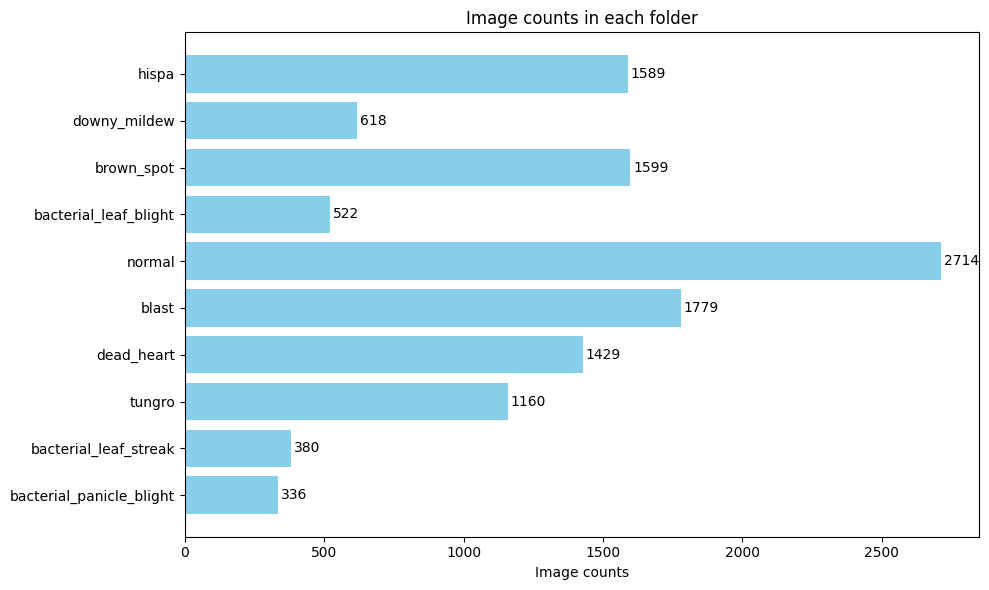

In [ ]:
# Get the list of categories (labels) from the set created earlier
categories = list(label_list) # Convert set to list for consistent ordering if needed, though os.listdir is used next
dataset_path = output_dir_task_1_all

print(f"Unique categories found: {categories}")

data_counts = [] # List to store label and count for plotting
# Iterate through each item (expected to be label directories) in the dataset path
for label_dir_name in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label_dir_name)
    # Check if the item is a directory
    if os.path.isdir(label_path):
        # Count the number of image files in the label directory
        count = len([file for file in os.listdir(label_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        data_counts.append({"label": label_dir_name, "count": count})

# Create a DataFrame from the collected counts
df_counts = pd.DataFrame(data_counts)
# Sort by count for better visualization, if desired
df_counts = df_counts.sort_values(by='count', ascending=False)

# Create the plot
plt.figure(figsize=(12, 8)) # Adjust figure size for better readability
bars = plt.barh(df_counts['label'], df_counts['count'], color='skyblue')

# Add text annotations for each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20,  # Adjust position for text
             bar.get_y() + bar.get_height()/2,
             f'{width}', 
             va='center', 
             fontsize=10)

plt.xlabel("Number of Images")
plt.ylabel("Disease/Label Category")
plt.title("Distribution of Images per Category (Task 1 Dataset)")
plt.gca().invert_yaxis()  # Display the category with the highest count at the top
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Split Data into Training and Validation Sets

This cell defines a function `split_train_val_with_sklearn` to split images within each category folder (from `output_dir_task_1_all`) into training and validation sub-folders. It aims for an 80/20 split.

- **Purpose**: To create separate training and validation datasets for model development and evaluation.
- **Key Components**:
    - `test_size=0.2`: Specifies a 20% split for the validation set (and thus 80% for training).
    - `random_state=42`: Ensures reproducibility of the split.
- **Why it Matters**: Separating data into training and validation sets is fundamental for training a model on one set of data and evaluating its generalization performance on unseen data, helping to prevent overfitting.

In [ ]:
# Define the base directory for the split data (train/val)
task_1_split_base_dir = os.path.join(output_images_base_dir, "Task_1")
train_dir = os.path.join(task_1_split_base_dir, "train")
val_dir = os.path.join(task_1_split_base_dir, "val")

# Ensure these directories exist, create if not
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Function to split images in a category folder into train and validation sets
def split_train_val_with_sklearn(category_images_path, target_train_dir, target_val_dir, test_size=0.2, random_state=42):
    # List all image files in the category path
    images = [f for f in os.listdir(category_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Split the images into training and validation sets
    train_images, val_images = train_test_split(images, test_size=test_size, random_state=random_state)

    # Get the category name from the path
    category_name = os.path.basename(category_images_path)

    # Create category-specific subdirectories in train and val directories
    os.makedirs(os.path.join(target_train_dir, category_name), exist_ok=True)
    os.makedirs(os.path.join(target_val_dir, category_name), exist_ok=True)

    # Copy training images
    for img_file_name in train_images:
        shutil.copy2(os.path.join(category_images_path, img_file_name), 
                       os.path.join(target_train_dir, category_name, img_file_name))

    # Copy validation images
    for img_file_name in val_images:
        shutil.copy2(os.path.join(category_images_path, img_file_name), 
                       os.path.join(target_val_dir, category_name, img_file_name))

    print(f"{category_name}: {len(train_images)} train, {len(val_images)} val")

In [ ]:
# Iterate through each category in the 'all' directory and split its images

for category in os.listdir(output_dir_task_1_all):
    category_path = os.path.join(output_dir_task_1_all, category)
    if os.path.isdir(category_path):
        split_train_val_with_sklearn(category_path, train_dir, val_dir, test_size=0.2)

hispa: 1271 train, 318 val
downy_mildew: 494 train, 124 val
brown_spot: 1292 train, 324 val
bacterial_leaf_blight: 468 train, 118 val
normal: 2171 train, 543 val
blast: 1446 train, 362 val
dead_heart: 1143 train, 286 val
tungro: 928 train, 232 val
bacterial_leaf_streak: 304 train, 76 val
bacterial_panicle_blight: 268 train, 68 val


### Zip Training and Validation Folders

This cell defines a function `zip_two_folders` and uses it to create a single zip archive (`task_1_extra_data.zip`) containing both the `train` and `val` directories created in the previous step.

In [ ]:
# Function to zip two specified folders into a single output zip file
def zip_two_folders(folder1_path, folder2_path, output_zip_filename):
    # Open the output zip file in write mode with DEFLATED compression
    with zipfile.ZipFile(output_zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Process the first folder
        print(f"Adding files from {folder1_path}...")
        for root, dirs, files in os.walk(folder1_path):
            for file in files:
                file_path = os.path.join(root, file)
                # arcname ensures that the directory structure within the zip starts from the folder itself
                arcname = os.path.relpath(file_path, os.path.dirname(folder1_path))
                zipf.write(file_path, arcname)
        
        # Process the second folder
        print(f"Adding files from {folder2_path}...")
        for root, dirs, files in os.walk(folder2_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, os.path.dirname(folder2_path))
                zipf.write(file_path, arcname)

    print(f"Successfully zipped folders '{os.path.basename(folder1_path)}' and '{os.path.basename(folder2_path)}' into '{output_zip_filename}'")

# Define the name for the output zip file
output_zip_file = 'task_1_extra_data.zip'

# Call the function to zip the train and validation directories
# train_dir and val_dir were defined in the previous cell
if os.path.isdir(train_dir) and os.path.isdir(val_dir):
    zip_two_folders(train_dir, val_dir, output_zip_file)
else:
    print(f"Error: Train directory ({train_dir}) or Validation directory ({val_dir}) not found.")

Zipped folders '/kaggle/working/output_images/Task_1/train' and '/kaggle/working/output_images/Task_1/val' into 'task_1_extra_data.zip'
